In [1]:
%matplotlib inline
%pprint off

from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt

from skimage import img_as_ubyte
from skimage.color import rgb2gray
from skimage.io import imread, imshow
from skimage.measure import label, regionprops
from skimage.morphology import binary_closing, binary_opening, disk
from skimage.filters import threshold_otsu
from skimage.transform import rescale

/home/lemaitre/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Pretty printing has been turned OFF


## Segmentation of toy example

In this exercise, you will have to automatically find how many type of coins are present on the picture `coins.jpg`.
Therefore, read the image as `ubyte` and display it. In order to speed-up the subsequent processes, divide the scale of the image by a factor of 4.

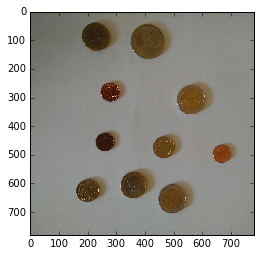

In [3]:
Path = './images/'
# Read the image
img = rescale(img_as_ubyte(imread(Path.__add__('coins.jpg'))), .25)

# Show the image
imshow(img)

Subsquently, threshold the image using a global Otsu's thresholding after converting the image into gray scale. Display the image.

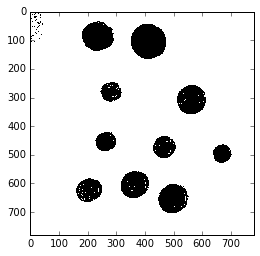

In [4]:
# Convert the image in gray scale
img_grey = rgb2gray(img)

# Apply Otsu's thresholding
threshold_global_otsu = threshold_otsu(img_grey)
global_otsu = img_grey >= threshold_global_otsu

# Dispaly the binary image
imshow(global_otsu)

Clean the image using some morphological operations, i.e. erosion, dilation, opening, closing ...

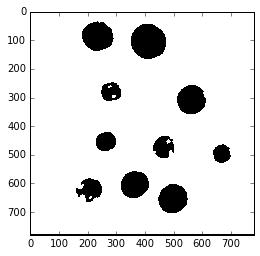

In [5]:
# Define the radius of the morpho operator
radius = 3
selem = disk(radius)

# Make a closing followed by an opening
img_cl = binary_closing(global_otsu, selem)
img_op = binary_opening(img_cl, selem)

# Display the resulting binary image
imshow(img_op)

Using the functions [`label`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label) and [`regionprops`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops) determine, the radius of each region and determine the number of type of coins in the image.

1. Show the image with the different labels.
1. How many regions do you find?
1. Display the radius of each region. Draw the corresponding circle on the image.

The number of regions is: 10
The radius of the region is 61 pxs
The area of the region is 11926 pxs
The radius of the region is 33 pxs
The area of the region is 3859 pxs
The radius of the region is 50 pxs
The area of the region is 8124 pxs
The radius of the region is 35 pxs
The area of the region is 3830 pxs
The radius of the region is 36 pxs
The area of the region is 4633 pxs
The radius of the region is 31 pxs
The area of the region is 3185 pxs
The radius of the region is 48 pxs
The area of the region is 7329 pxs
The radius of the region is 39 pxs
The area of the region is 5592 pxs
The radius of the region is 51 pxs
The area of the region is 8297 pxs


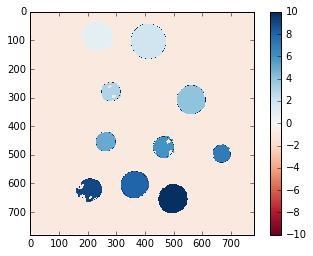

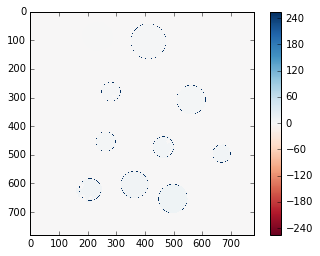

In [6]:
from skimage.draw import circle_perimeter
# Transform the binary image into different labels - Be careful the background is True
img_label = label(img_op, background=True)
regions = regionprops(img_label)

# Display the image with the different labels
imshow(img_label)

# Display the number of regions found
print('The number of regions is: {}'.format(len(regions)))

# Display the radius of each region
for idx_region, region in enumerate(regions):
    if idx_region == 0:
        continue
    radius = region.equivalent_diameter / 2.
    print('The radius of the region is {:.0f} pxs'.format(radius))
    print('The area of the region is {:.0f} pxs'.format(region.convex_area))
    circle_coord = circle_perimeter(int(region.centroid[0]), int(region.centroid[1]), int(radius))
    img_label[circle_coord[0], circle_coord[1]] = 255#len(regions)
    
plt.figure()
imshow(img_label)

## Segmentation of markers

Considering the techniques you used in the previous exercise, try to segment different objects in `objets4.jpg` image.

Using segmentation find the number of each object in the image. 

Considering that this is not as straight forward as the previous example, come up with your creative solutions and in case of failar explain the reasons and problems. 

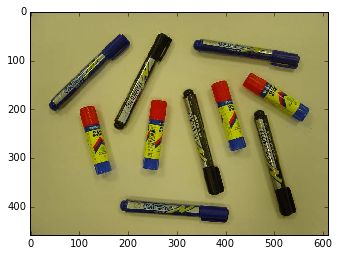

In [7]:
# Load the image
from skimage.io import imread
from skimage import img_as_float
img = img_as_float(imread(Path.__add__('objets4.jpg')))

# Show the image
from skimage.io import imshow
imshow(img)

/home/lemaitre/anaconda/lib/python2.7/site-packages/scikit_image-0.12.dev0-py2.7-linux-x86_64.egg/skimage/util/dtype.py:111: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


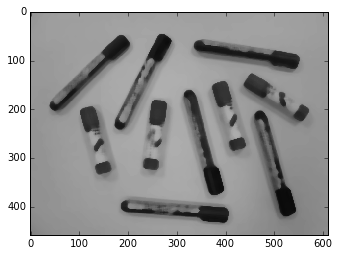

In [8]:
# Convert the image in gray scale in order to apply thresholding
from skimage.color import rgb2gray
img_grey = rgb2gray(img)

# Apply a median filter
from skimage.filters import median
from skimage.morphology import square

selem = square(10)
img_grey = median(img_grey, selem)

imshow(img_grey)

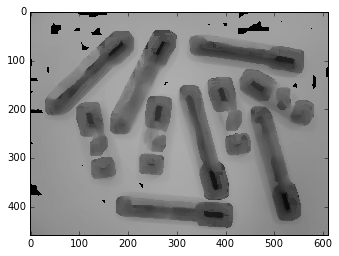

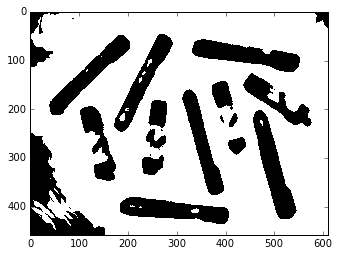

In [9]:
# Apply local and global Otsu
from skimage.filters import threshold_otsu, rank
from skimage.morphology import disk, square
from skimage.filters import threshold_adaptive

radius = 20
selem = square(radius)

local_otsu = rank.otsu(img_grey, selem)
threshold_global_otsu = threshold_otsu(img_grey)
bw_img = img_grey >= threshold_global_otsu

bw_img = threshold_adaptive(img_grey, 201)

plt.figure()
imshow(local_otsu)

plt.figure()
imshow(bw_img)

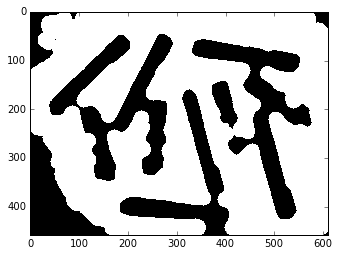

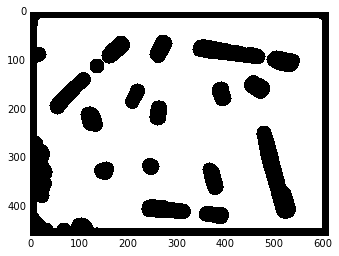

In [10]:
# Make some morpho-math
from skimage.morphology import binary_opening, binary_closing

radius = 15
selem = disk(radius)

op_img = binary_opening(bw_img, selem)
cl_img = binary_closing(bw_img, selem)

plt.figure()
imshow(op_img)

plt.figure()
imshow(cl_img)